dataset : https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("mnist_train.csv")

In [3]:
dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset.shape

(60000, 785)

In [5]:
X = dataset.iloc[:,1:]
Y= dataset.iloc[:,:1]

In [6]:

X.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y=Y.values.ravel()
Y

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,))

In [8]:
set(Y)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)}

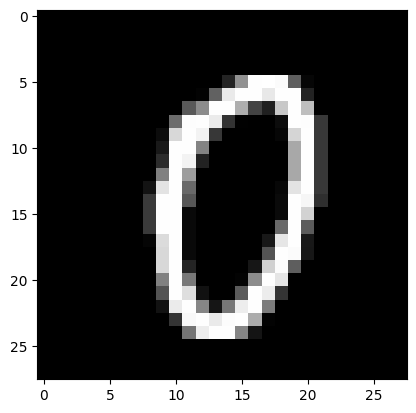

In [20]:
import matplotlib.pyplot as plt

n=1000
sample = X.iloc[n].values.reshape(28,28)
plt.imshow(sample,cmap="gray")
plt.show()


In [21]:
test = pd.read_csv("mnist_test.csv")

In [22]:
X_test = test.iloc[:,1:]
Y_test= test.iloc[:,:1]

SVM

In [23]:
from sklearn import svm

model = svm.SVC()

In [24]:
model.fit(X,Y)

SVC()

In [25]:
from sklearn.metrics import classification_report , confusion_matrix

In [26]:
y_=model.predict(X_test)
report=classification_report(Y_test,y_)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [27]:
confusion_matrix(Y_test,y_)

array([[ 973,    0,    1,    0,    0,    2,    1,    1,    2,    0],
       [   0, 1126,    3,    1,    0,    1,    1,    1,    2,    0],
       [   6,    1, 1006,    2,    1,    0,    2,    7,    6,    1],
       [   0,    0,    2,  995,    0,    2,    0,    5,    5,    1],
       [   0,    0,    5,    0,  961,    0,    3,    0,    2,   11],
       [   2,    0,    0,    9,    0,  871,    4,    1,    4,    1],
       [   6,    2,    0,    0,    2,    3,  944,    0,    1,    0],
       [   0,    6,   11,    1,    1,    0,    0,  996,    2,   11],
       [   3,    0,    2,    6,    3,    2,    2,    3,  950,    3],
       [   3,    4,    1,    7,   10,    2,    1,    7,    4,  970]])

KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='auto')
knn_model.fit(X, Y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [30]:
y_knn = knn_model.predict(X_test)
report_knn = classification_report(Y_test, y_knn)
print(report_knn)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.95      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



real test

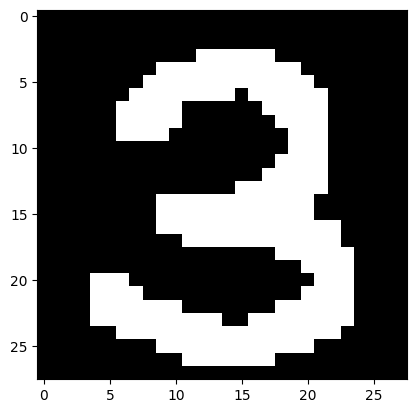

In [76]:
import cv2
img = cv2.imread("test.png", cv2.IMREAD_GRAYSCALE)
img = 255 - img  
plt.imshow(img,cmap="gray")
plt.show()

In [77]:
img=img.flatten()
img.shape

(784,)

In [78]:
img = img.reshape(1, -1) 
img.shape

(1, 784)

In [79]:
img = pd.DataFrame(img, columns=X.columns)

In [80]:
print("svm",model.predict(img))
print("knn",knn_model.predict(img))

svm [3]
knn [3]
